***Title: Transient response of Giovanna's device at $\epsilon$ = 4 MHz***  
***Date: 09/03/17***

In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import csv
import os
cwd = os.getcwd()
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 8)


def mean_photons_calc(probabilities):
    photons = np.zeros(probabilities.shape[1])
    for i in range(photons.shape[0]):
        for j in range(probabilities.shape[0]):
            photons[i] = photons[i] + j * probabilities[j, i]
    return photons


def times_qload(folder_path):
    times_path = folder_path + '/times'
    times = qload(times_path)
    times = times / (2 * np.pi * 1000)
    return times


class Parameters:
    def __init__(self, wc, wq, eps, g, chi, kappa, gamma, t_levels, c_levels):
        self.wc = wc
        self.wq = wq
        self.eps = eps
        self.g = g
        self.chi = chi
        self.gamma = gamma
        self.kappa = kappa
        self.t_levels = t_levels
        self.c_levels = c_levels

    def copy(self):
        params = Parameters(self.wc, self.wq, self.eps, self.g, self.chi, self.kappa, self.gamma, self.t_levels, self.c_levels)
        return params


class Results:
    def __init__(self, params=np.array([]), wd_points=np.array([]),
                 transmissions=np.array([]), edge_occupations_c=np.array([]), edge_occupations_t=np.array([])):
        self.params = params
        self.wd_points = wd_points
        self.transmissions = transmissions
        self.edge_occupations_c = edge_occupations_c
        self.edge_occupations_t = edge_occupations_t
        self.abs_transmissions = np.absolute(self.transmissions)
        self.size = self.wd_points.size

    def concatenate(self, results):
        combined_params = np.concatenate([self.params, results.params])
        combined_wd_points = np.concatenate([self.wd_points, results.wd_points])
        combined_transmissions = np.concatenate([self.transmissions, results.transmissions])
        combined_edge_occupations_c = np.concatenate([self.edge_occupations_c, results.edge_occupations_c])
        combined_edge_occupations_t = np.concatenate([self.edge_occupations_t, results.edge_occupations_t])
        sort_indices = np.argsort(combined_wd_points)
        combined_params = combined_params[sort_indices]
        combined_wd_points = combined_wd_points[sort_indices]
        combined_transmissions = combined_transmissions[sort_indices]
        combined_edge_occupations_c = combined_edge_occupations_c[sort_indices]
        combined_edge_occupations_t = combined_edge_occupations_t[sort_indices]
        combined_results = Results(combined_params, combined_wd_points,
                                   combined_transmissions, combined_edge_occupations_c, combined_edge_occupations_t)
        return combined_results

    def delete(self, indices):
        reduced_params = np.delete(self.params, indices)
        reduced_wd_points = np.delete(self.wd_points, indices)
        reduced_transmissions = np.delete(self.transmissions, indices)
        reduced_edge_occupations_c = np.delete(self.edge_occupations_c, indices)
        reduced_edge_occupations_t = np.delete(self.edge_occupations_t, indices)
        reduced_results = Results(reduced_params, reduced_wd_points,
                                  reduced_transmissions, reduced_edge_occupations_c, reduced_edge_occupations_t)
        params_change = (reduced_params == self.params)
        wd_points_change = (reduced_wd_points == self.wd_points)
        transmissions_change = (reduced_transmissions == self.transmissions)
        edge_occupations_c_change = (reduced_edge_occupations_c == self.edge_occupations_c)
        edge_occupations_t_change = (reduced_edge_occupations_t == self.edge_occupations_t)
        print np.all([params_change, wd_points_change, transmissions_change, edge_occupations_c_change, edge_occupations_t_change])
        return reduced_results

    def queue(self):
        queue = Queue(self.params, self.wd_points)
        return queue

Loaded dict object.


/usr/lib64/python2.7/site-packages/matplotlib/collections.py:526: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


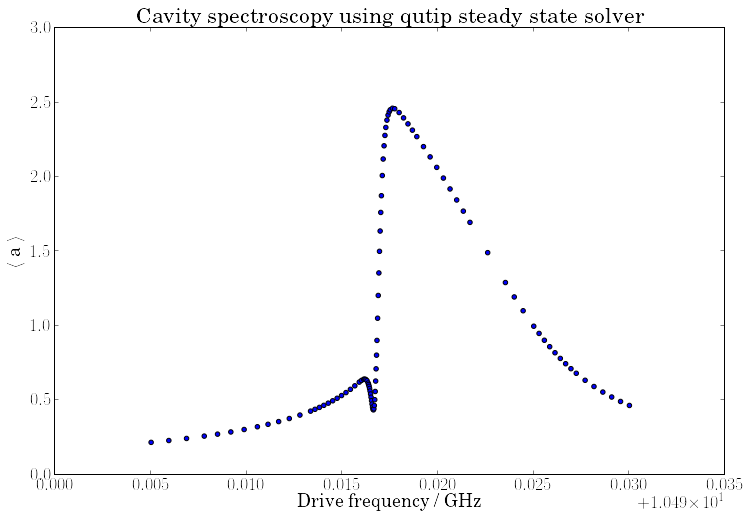

In [3]:
spectroscopy_path = cwd + '/readout_spectroscopy/spectroscopy'
multi_results = qload(spectroscopy_path)
results = multi_results[0.004]
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'size'   : 18}
plt.rc('font', **font)
pylab.rcParams['figure.figsize'] = (12, 8)
plt.scatter(results.wd_points, results.abs_transmissions)
plt.title('Cavity spectroscopy using qutip steady state solver')
plt.xlabel('Drive frequency / GHz')
plt.ylabel(r'$\langle$ a $\rangle$')

The graph above shows the results of a qutip simulation of spectroscopy of Giovanna's current device with a drive amplitude of $\epsilon$ = 4 MHz. I'm interested in simulating the transient response of the cavity with different initial transmon states and I'm particularly interested in drive frequencies around the dip since this indicates the presence of bistability.  

For reference the parameters of the system can be seen below.

In [4]:
params = qload(cwd + '/readout_steady_state/2017-03-08--18-03-03/params')
print "Transmon levels = " + str(params.t_levels)
print "Cavity levels = " + str(params.c_levels)
print "Bare cavity resonance f_c = " + str(params.wc) + " GHz"
print "First transmon transition f_01 = " + str(params.wq) + " GHz"
print "Cavity decay rate \kappa = " + str(params.kappa) + " GHz"
print "Transmon relaxation rate \gamma = " + str(params.gamma) + " GHz"
print "Coupling g = " + str(params.g) + " GHz"
print "Transmon non-linearity = " + str(params.chi) + " GHz"
print "Drive \epsilon = " + str(params.eps) + " GHz"

Loaded instance object.
Transmon levels = 5
Cavity levels = 20
Bare cavity resonance f_c = 10.4267 GHz
First transmon transition f_01 = 9.39128 GHz
Cavity decay rate \kappa = 0.00147 GHz
Transmon relaxation rate \gamma = 0.000833 GHz
Coupling g = 0.3096 GHz
Transmon non-linearity = -0.097 GHz
Drive \epsilon = 0.004 GHz


Loaded dict object.
Loaded dict object.
Loaded dict object.
Loaded dict object.
Loaded ndarray object.


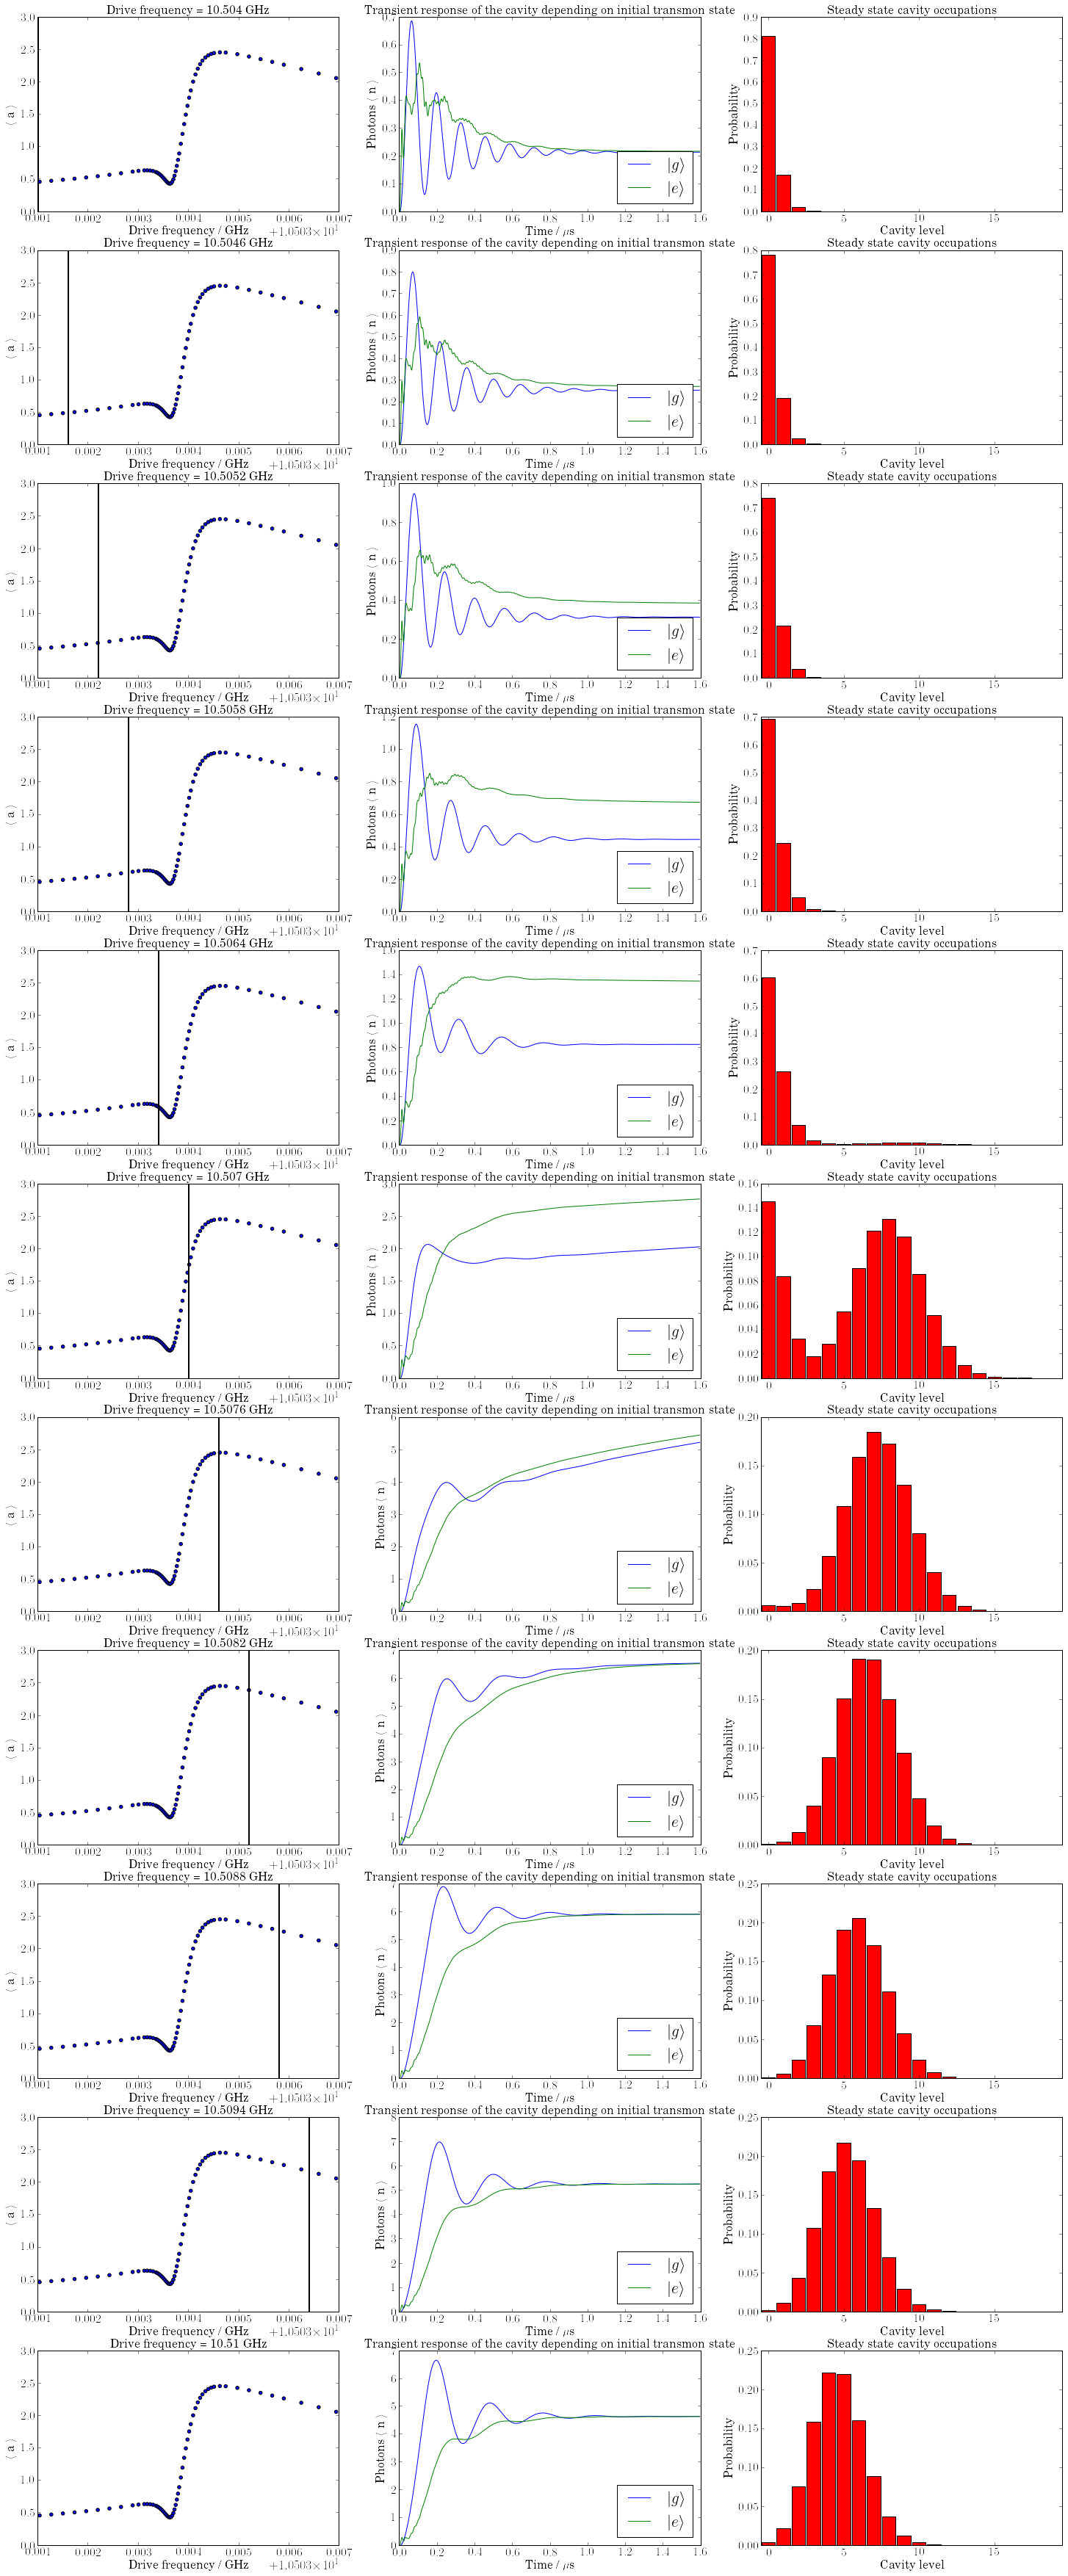

In [5]:
master_down_path = cwd + '/master/3/master_readout_down/2017-03-08--17-36-21'
multi_results_down = qload(master_down_path + '/expectations')
master_up_path = cwd + '/master/3/master_readout_up/2017-03-08--17-35-42'
multi_results_up = qload(master_up_path + '/expectations')
rho_ss_dict = qload(cwd + '/readout_steady_state/2017-03-08--18-03-03/density_matrix')

spectroscopy_path = cwd + '/readout_spectroscopy/spectroscopy'
multi_results_spec = qload(spectroscopy_path)
spec_results = multi_results_spec[0.004]

times = times_qload(master_down_path)
keys = sorted(multi_results_down.keys())
number_of_drives = len(multi_results_down)
fontsize = 17
width = 0.9
fontsize = 16
rows = number_of_drives
columns = 3
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'size'   : 18}
plt.rc('font', **font)
pylab.rcParams['figure.figsize'] = (25, 17 * number_of_drives)
for idx, key in enumerate(keys):
    plt.subplot(columns*rows, columns, 1 + columns*idx)
    plt.scatter(spec_results.wd_points, spec_results.abs_transmissions)
    plt.title('Drive frequency = ' + str(key) + ' GHz', fontsize=fontsize)
    plt.xlabel('Drive frequency / GHz', fontsize=fontsize)
    plt.ylabel(r'$\langle$ a $\rangle$', fontsize=fontsize)
    plt.xlim([10.504, 10.51])
    plt.axvline(x=key, ymin=0.0, ymax = 3.0, linewidth=2, color='k')
    plt.tick_params(axis='both', labelsize=fontsize)
    
    plt.subplot(rows*columns, columns, columns*idx + 2)
    mean_photons_down = mean_photons_calc(np.array(multi_results_down[key]))
    mean_photons_up = mean_photons_calc(np.array(multi_results_up[key]))
    plt.plot(times, mean_photons_down)
    plt.plot(times, mean_photons_up)
    legend = [r'$| g \rangle$', r'$| e \rangle$']
    plt.legend(legend, loc=4)
    plt.xlabel(r'Time / $\mu$s', fontsize=fontsize)
    plt.ylabel(r'Photons $\langle$ n $\rangle$', fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.title('Transient response of the cavity depending on initial transmon state', fontsize=fontsize)
    
    plt.subplot(rows*columns, columns, 3 + columns*idx)
    rho_ss = rho_ss_dict[key]
    rho_c_ss = rho_ss.ptrace(0)
    cavity_occupations_qutip = rho_c_ss.diag()
    ind = np.arange(cavity_occupations_qutip.size)
    plt.bar(ind - width / 2, cavity_occupations_qutip, width, color='r')
    plt.xlim([-0.5, cavity_occupations_qutip.size - 0.5])
    plt.title('Steady state cavity occupations', fontsize=fontsize)
    plt.xlabel('Cavity level', fontsize=fontsize)
    plt.ylabel('Probability', fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)

The grid of graphs above show the results of a drive frequency sweep through the dip. Each row corresponds to a different drive frequency which can be seen in the left hand column. The central colummn shows the transient response of the cavity as calculated using the qutip master equation solver. The left hand colum shows a histogram of cavity level occupations which you would expect in the steady state.  

The first thing to notice about the transient responses is that either side of the dip the two responses quickly converge to the steady state over a period of about 1 $\mu$s which is close to the timescales set by the cavity and transmon relaxation times which are 0.7 $\mu$s and 1.2 $\mu$s respectively. However, close to the dip, where we have bistabilility, the two transient responses do not converge with each other even over the full 1.6 $\mu$s which I have simulated. As seen in the previous notebook these states can take many 10s of microseconds to reach steady state and converge with eachother.  

At this drive power the contrast between the transient responses is not large enough for use in a readout mechanism. The largest contrast occurs at a dirve frequency of 10.507 GHz and I estimate that at 1.6 $\mu$s the occupation of the bright state is 25% if the transmon started in the first excited state and 15% if the transmon started in the ground state. On the other hand I think the physical effect is still quite cool and it would be good to ask Giovanna to try and observe it. Also it may be that at higher drive powers the contrast will increase to the point where it can be used for readout.  

Now the final thing to consider is the "high power readout" I during the MRes project when I increased the drive power above the region of bistability. Back then I was taking sweeps in drive power but here I have taken a sweep in drive frequency instead and "high power readout" corresponds to "high frequency readout". For example if you look at the highest frequency graphs (10.51 GHz) you'll see there is quite a large contrast between the two transient responses. If the qubit started in the ground state the cavity photon number rises more quickly and goes through ringing oscillations.  

So basically there are two regions I'm working on. The first is with drive frequencies around the dip where I'm looking a bistability and how it takes a long time for the transients to converge. The second is at higher drive frequencies where there is a larger contrast between the transients at short times which could be used to perform readout before noise starts to mix the trajectories together.

If you look further down the page you will see results from a finer sweep more closely focused on the region of bistability.

Loaded dict object.
Loaded dict object.
Loaded dict object.
Loaded dict object.
Loaded ndarray object.


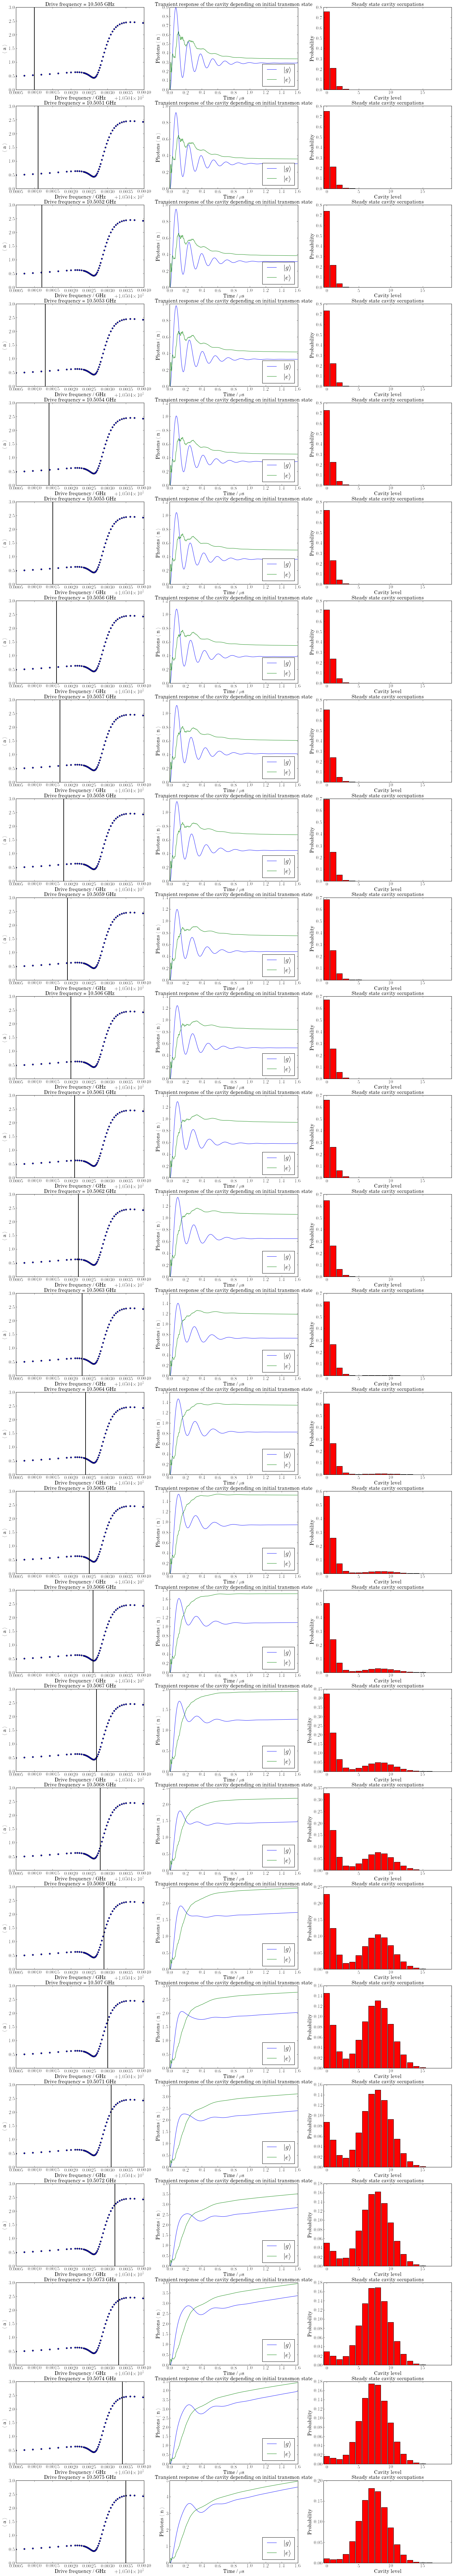

In [133]:
master_down_path = cwd + '/master/4/master_readout_4MHz_down/2017-03-09--18-11-24'
multi_results_down = qload(master_down_path + '/expectations')
master_up_path = cwd + '/master/4/master_readout_4MHz_up/2017-03-09--18-07-30'
multi_results_up = qload(master_up_path + '/expectations')
rho_ss_dict = qload(cwd + '/readout_steady_state/2017-03-09--16-57-20/density_matrix')

spectroscopy_path = cwd + '/readout_spectroscopy/spectroscopy'
multi_results_spec = qload(spectroscopy_path)
spec_results = multi_results_spec[0.004]

times = times_qload(master_down_path)
keys = sorted(multi_results_down.keys())
number_of_drives = len(multi_results_down)
fontsize = 17
width = 0.9
fontsize = 16
rows = number_of_drives
columns = 3
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'size'   : 18}
plt.rc('font', **font)
pylab.rcParams['figure.figsize'] = (25, 17 * number_of_drives)
for idx, key in enumerate(keys):
    plt.subplot(columns*rows, columns, 1 + columns*idx)
    plt.scatter(spec_results.wd_points, spec_results.abs_transmissions)
    plt.title('Drive frequency = ' + str(key) + ' GHz', fontsize=fontsize)
    plt.xlabel('Drive frequency / GHz', fontsize=fontsize)
    plt.ylabel(r'$\langle$ a $\rangle$', fontsize=fontsize)
    plt.xlim([10.5045, 10.508])
    plt.axvline(x=key, ymin=0.0, ymax = 3.0, linewidth=2, color='k')
    plt.tick_params(axis='both', labelsize=fontsize)
    
    plt.subplot(rows*columns, columns, columns*idx + 2)
    mean_photons_down = mean_photons_calc(np.array(multi_results_down[key]))
    mean_photons_up = mean_photons_calc(np.array(multi_results_up[key]))
    plt.plot(times, mean_photons_down)
    plt.plot(times, mean_photons_up)
    legend = [r'$| g \rangle$', r'$| e \rangle$']
    plt.legend(legend, loc=4)
    plt.xlabel(r'Time / $\mu$s', fontsize=fontsize)
    plt.ylabel(r'Photons $\langle$ n $\rangle$', fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.title('Transient response of the cavity depending on initial transmon state', fontsize=fontsize)
    
    plt.subplot(rows*columns, columns, 3 + columns*idx)
    rho_ss = rho_ss_dict[key]
    rho_c_ss = rho_ss.ptrace(0)
    cavity_occupations_qutip = rho_c_ss.diag()
    ind = np.arange(cavity_occupations_qutip.size)
    plt.bar(ind - width / 2, cavity_occupations_qutip, width, color='r')
    plt.xlim([-0.5, cavity_occupations_qutip.size - 0.5])
    plt.title('Steady state cavity occupations', fontsize=fontsize)
    plt.xlabel('Cavity level', fontsize=fontsize)
    plt.ylabel('Probability', fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)